In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score


In [ ]:
testdata = pd.read_csv('test.csv')
traindata = pd.read_csv('train.csv')

In [ ]:
## Clean Up Data

traindata.describe()

testdata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
traindata.fillna(0, inplace=True)
traindata.head()
df = traindata

dummy_df = pd.get_dummies(df, columns=['MSZoning'], prefix='Zoning')

dummy_df = dummy_df.replace({False: 0, True: 1})

dummy_df = dummy_df.replace({'Normal': 0, 'Abnorml': 1})

dummy_df = pd.get_dummies(dummy_df, columns=['Street'], prefix='Street')

dummy_df = dummy_df.replace({False: 0, True: 1})

dummy_df = dummy_df.replace({'Reg': 0, 'IR1': 1,'IR2': 2, 'IR3': 3})

CleanTrainData = dummy_df

CleanTrainData

<ipython-input-35-5d098d40ae11>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_df = dummy_df.replace({False: 0, True: 1})
<ipython-input-35-5d098d40ae11>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_df = dummy_df.replace({False: 0, True: 1})
<ipython-input-35-5d098d40ae11>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,SalePrice,Zoning_C (all),Zoning_FV,Zoning_RH,Zoning_RL,Zoning_RM,Street_Grvl,Street_Pave
0,1,60,65.0,8450,0,0,Lvl,AllPub,Inside,Gtl,...,WD,0,208500,0,0,0,1,0,0,1
1,2,20,80.0,9600,0,0,Lvl,AllPub,FR2,Gtl,...,WD,0,181500,0,0,0,1,0,0,1
2,3,60,68.0,11250,0,1,Lvl,AllPub,Inside,Gtl,...,WD,0,223500,0,0,0,1,0,0,1
3,4,70,60.0,9550,0,1,Lvl,AllPub,Corner,Gtl,...,WD,1,140000,0,0,0,1,0,0,1
4,5,60,84.0,14260,0,1,Lvl,AllPub,FR2,Gtl,...,WD,0,250000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,0,0,Lvl,AllPub,Inside,Gtl,...,WD,0,175000,0,0,0,1,0,0,1
1456,1457,20,85.0,13175,0,0,Lvl,AllPub,Inside,Gtl,...,WD,0,210000,0,0,0,1,0,0,1
1457,1458,70,66.0,9042,0,0,Lvl,AllPub,Inside,Gtl,...,WD,0,266500,0,0,0,1,0,0,1
1458,1459,20,68.0,9717,0,0,Lvl,AllPub,Inside,Gtl,...,WD,0,142125,0,0,0,1,0,0,1


In [ ]:
testdata.fillna(0, inplace=True)
testdata.head()

df = testdata

dummy_df1 = pd.get_dummies(df, columns=['MSZoning'], prefix='Zoning')

dummy_df1 = dummy_df1.replace({False: 0, True: 1})

dummy_df1 = dummy_df1.replace({'Normal': 0, 'Abnorml': 1})

dummy_df1 = pd.get_dummies(dummy_df1, columns=['Street'], prefix='Street')

dummy_df1 = dummy_df1.replace({False: 0, True: 1})

dummy_df1 = dummy_df1.replace({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})

# Save cleaned test data
CleanTestData = dummy_df1

CleanTestData

<ipython-input-36-40a8989b614b>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_df1 = dummy_df1.replace({False: 0, True: 1})
<ipython-input-36-40a8989b614b>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_df1 = dummy_df1.replace({False: 0, True: 1})
<ipython-input-36-40a8989b614b>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_optio

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,Zoning_0,Zoning_C (all),Zoning_FV,Zoning_RH,Zoning_RL,Zoning_RM,Street_Grvl,Street_Pave
0,1461,20,80.0,11622,0,0,Lvl,AllPub,Inside,Gtl,...,WD,0,0,0,0,1,0,0,0,1
1,1462,20,81.0,14267,0,1,Lvl,AllPub,Corner,Gtl,...,WD,0,0,0,0,0,1,0,0,1
2,1463,60,74.0,13830,0,1,Lvl,AllPub,Inside,Gtl,...,WD,0,0,0,0,0,1,0,0,1
3,1464,60,78.0,9978,0,1,Lvl,AllPub,Inside,Gtl,...,WD,0,0,0,0,0,1,0,0,1
4,1465,120,43.0,5005,0,1,HLS,AllPub,Inside,Gtl,...,WD,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,0,0,Lvl,AllPub,Inside,Gtl,...,WD,0,0,0,0,0,0,1,0,1
1455,2916,160,21.0,1894,0,0,Lvl,AllPub,Inside,Gtl,...,WD,1,0,0,0,0,0,1,0,1
1456,2917,20,160.0,20000,0,0,Lvl,AllPub,Inside,Gtl,...,WD,1,0,0,0,0,1,0,0,1
1457,2918,85,62.0,10441,0,0,Lvl,AllPub,Inside,Gtl,...,WD,0,0,0,0,0,1,0,0,1


In [ ]:
sparse_threshold = 0.5
columns_to_drop = [
    col for col in traindata.columns if col != "SalePrice"
    and (
        col not in testdata.columns
        or traindata[col].isnull().mean() > sparse_threshold
        or testdata[col].isnull().mean() > sparse_threshold
    )
]

cleaned_traindata = traindata.drop(columns=columns_to_drop)
cleaned_testdata = testdata.drop(columns=columns_to_drop)

# cleaned data
cleaned_traindata.to_csv("cleaned_train.csv", index=False)
cleaned_testdata.to_csv("cleaned_test.csv", index=False)

print(f"Columns remaining in training data: {len(cleaned_traindata.columns)}")
print(f"Columns remaining in test data: {len(cleaned_testdata.columns)}")

Columns remaining in training data: 81
Columns remaining in test data: 80


In [ ]:
testdata.fillna(0)
traindata.fillna(0)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


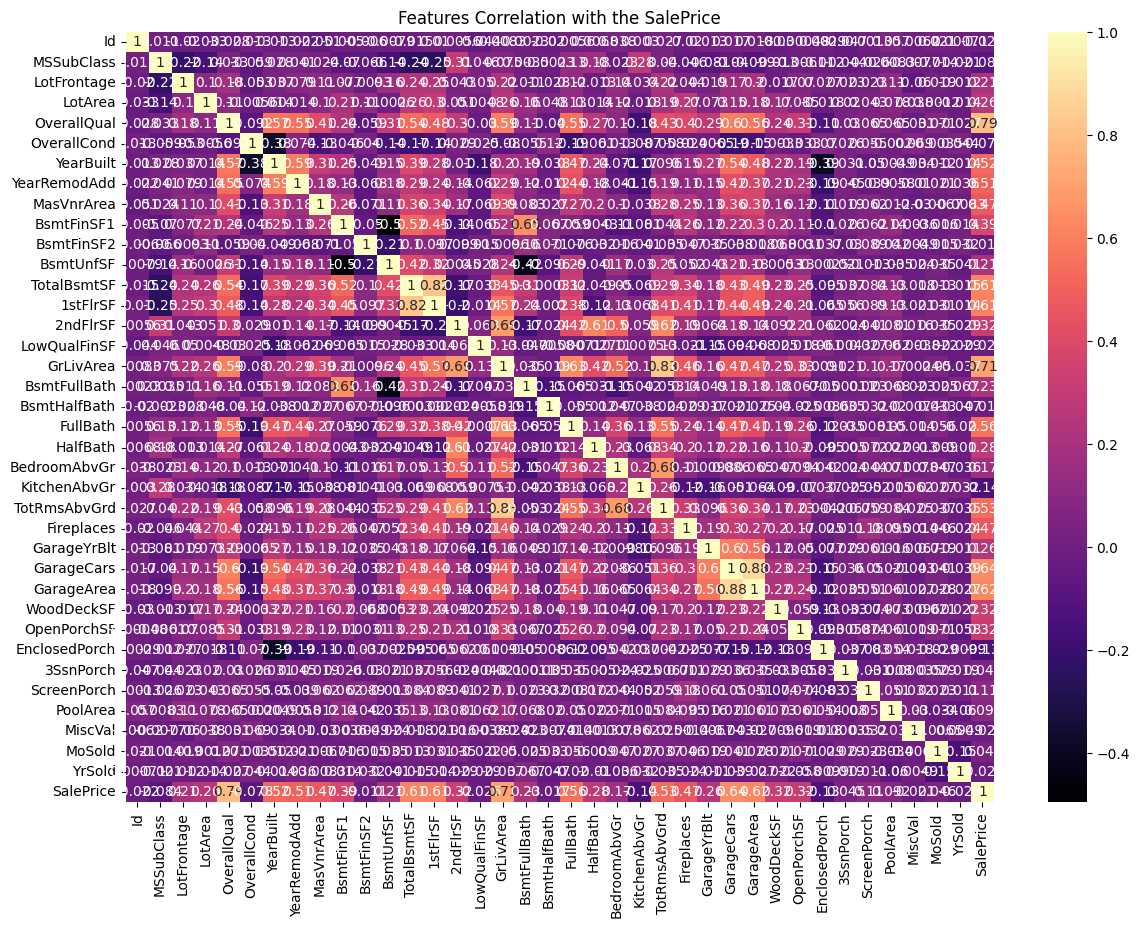

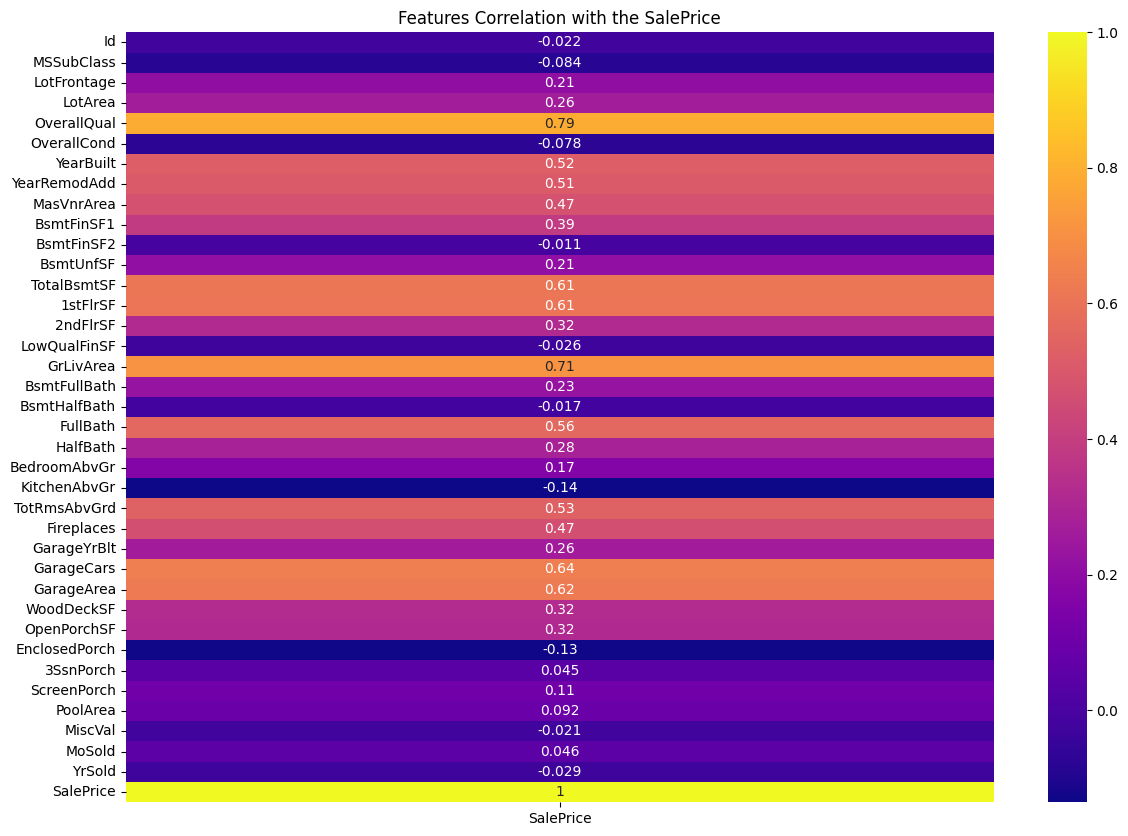

In [ ]:
#Correlation Matricies
correlation_matrix = cleaned_traindata.corr(numeric_only=True)
#correlation_matrix

#General Correlation Matrix
#May need to adjust the size on this one
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Features Correlation with the SalePrice')
plt.show()

#Correlation Matrix with SalePrice (target variable)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='plasma')
plt.title('Features Correlation with the SalePrice')
plt.show()



Root Mean Squared Error (RMSE) on validation set: 28924.342880332373
Mean Absolute Error: 17717.058630136988
R² Score: 0.8890726529340696


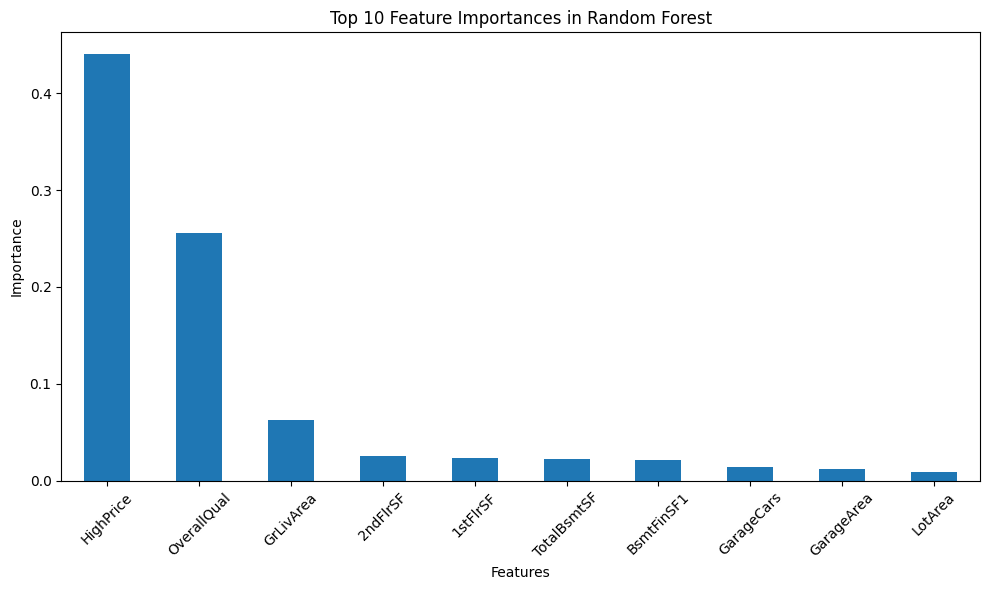

AUC: 1.0


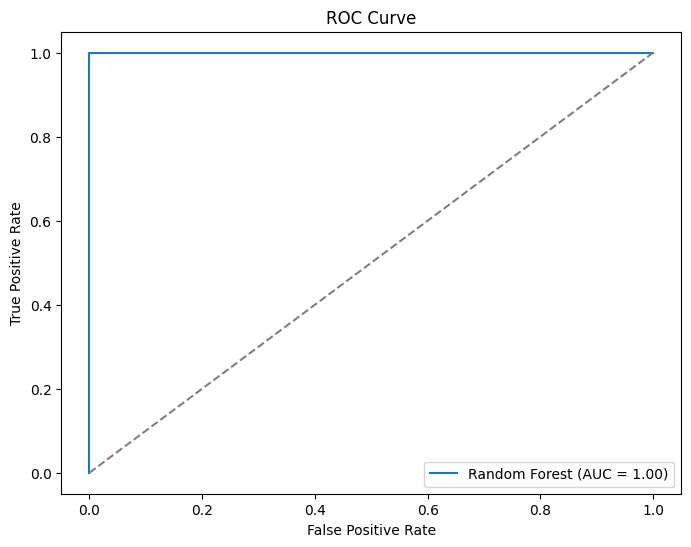

In [ ]:
## Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve


X = cleaned_traindata.drop(columns=["SalePrice"])
y = cleaned_traindata["SalePrice"]
X = pd.get_dummies(X)
cleaned_testdata_encoded = pd.get_dummies(cleaned_testdata)
X, cleaned_testdata_encoded = X.align(cleaned_testdata_encoded, join="left", axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Root Mean Squared Error (RMSE) on validation set: {rmse}")

#predictions
test_predictions = rf_model.predict(cleaned_testdata_encoded)
test_predictions_df = pd.DataFrame({
    "Id": cleaned_testdata["Id"],
    "SalePrice": test_predictions
})
test_predictions_df.to_csv("RFtest_predictions.csv", index=False)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

plt.figure(figsize=(10, 6))
sorted_importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#AUC
median_price = cleaned_traindata['SalePrice'].median()
cleaned_traindata['HighPrice'] = (cleaned_traindata['SalePrice'] > median_price).astype(int)
X = cleaned_traindata[top_features]
y = cleaned_traindata['HighPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


AUC Score: 0.9854677350528661


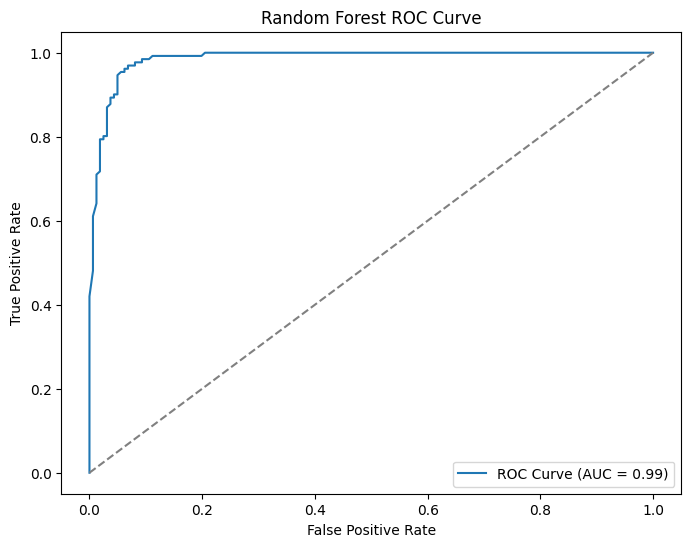

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_val_proba = rf_classifier.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_val_proba)
print(f"AUC Score: {auc_score}")
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [48]:
#RF Forrest

median_sale_price = y.median()
y_train_bin = (y_train > median_sale_price).astype(int)
y_val_bin = (y_val > median_sale_price).astype(int)
y_test_bin = (y_test > median_sale_price).astype(int)
y_train_proba = rf_model.predict(X_train)
y_val_proba = rf_model.predict(X_val)
y_test_proba = rf_model.predict(X_test)

train_auc = roc_auc_score(y_train_bin, y_train_proba)
val_auc = roc_auc_score(y_val_bin, y_val_proba)
test_auc = roc_auc_score(y_test_bin, y_test_proba)

auc_scores = pd.DataFrame({
    'Train AUC': [train_auc],
    'Validation AUC': [val_auc],
    'Test AUC': [test_auc]
})
print(auc_scores)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- HighPrice


In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Re-split my data because I was worried about Contamination

#Dropped Target
X = cleaned_traindata.drop(columns=['SalePrice'])
y = cleaned_traindata['SalePrice']
X = pd.get_dummies(X)
cleaned_testdata_encoded = pd.get_dummies(cleaned_testdata)
X, cleaned_testdata_encoded = X.align(cleaned_testdata_encoded, join="left", axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Specificed Hyperparamters I found doing a grid_search on a seperate file, specifically the eta = 0.05, depth = 3, min_child = 4
Xmodel = xgb.XGBRegressor(
    objective='reg:squarederror',
    eta=0.05,
    max_depth=3,
    min_child_weight=4,
    n_jobs=-1,
    random_state=42
)

Xmodel.fit(X_train, y_train)


y_pred = Xmodel.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Validation RMSE: {rmse}")


test_predictions = Xmodel.predict(cleaned_testdata_encoded)
test_predictions_df = pd.DataFrame({
    "Id": cleaned_testdata["Id"],
    "SalePrice": test_predictions
})
test_predictions_df.to_csv("Xtest_predictions.csv", index=False)


Validation RMSE: 22485.8860816564


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#Combine the two prediction CSV's to make one final submission CSV

rf_predictions = pd.read_csv('RFtest_predictions.csv')
x_predictions = pd.read_csv('Xtest_predictions.csv')
merged_predictions = pd.merge(rf_predictions, x_predictions, on='Id', suffixes=('_RF', '_X'))
#Averages out
merged_predictions['SalePrice'] = (merged_predictions['SalePrice_RF'] + merged_predictions['SalePrice_X']) / 2
final_predictions = merged_predictions[['Id', 'SalePrice']]
#Creates merged CSV
final_predictions.to_csv('merged_predictions.csv', index=False)


     Id   SalePrice
0  1461  128550.070
1  1462  159353.085
2  1463  175869.590
3  1464  184040.625
4  1465  204114.890


In [ ]:
#Train, Valid, Test AUC

#XgBoost:
median_sale_price = y.median()
y_train_bin = (y_train > median_sale_price).astype(int)
y_val_bin = (y_val > median_sale_price).astype(int)
y_test_bin = (y_test > median_sale_price).astype(int)
y_train_proba = Xmodel.predict(X_train)
y_val_proba = Xmodel.predict(X_val)
y_test_proba = Xmodel.predict(X_test)

train_auc = roc_auc_score(y_train_bin, y_train_proba)
val_auc = roc_auc_score(y_val_bin, y_val_proba)
test_auc = roc_auc_score(y_test_bin, y_test_proba)

auc_scores = pd.DataFrame({
    'Train AUC': [train_auc],
    'Validation AUC': [val_auc],
    'Test AUC': [test_auc]
})
print(auc_scores)


   Train AUC  Validation AUC  Test AUC
0   0.981984        0.993411  0.982347


In [46]:
# Compute ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XgBoost Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print the AUC
print(f"AUC: {roc_auc}")

NameError: name 'y_pred_prob' is not defined